# Decision Tree Classification

## Importing the libraries

In [13]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import seaborn as sns

In [3]:
# Import the os module
import os
# Get the current working directory
cwd = os.getcwd()
print(cwd)

# Change the current working directory
os.chdir('C:/Users/javij/OneDrive/Documentos/GitHub/Material-CNBV/MOD 8/Datasets')

actual = os.getcwd()
print(actual)


C:\Users\javij\OneDrive\Documentos\GitHub\Material-CNBV\MOD 8\Codigos Python
C:\Users\javij\OneDrive\Documentos\GitHub\Material-CNBV\MOD 8\Datasets


## Importing the dataset

In [4]:
iris = datasets.load_iris()


In [5]:

X = iris.data[:, 2:]
y = iris.target


## Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Decision Tree Classification model on the Training set

In [8]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Predicting the Test set results

In [9]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  1  8]]


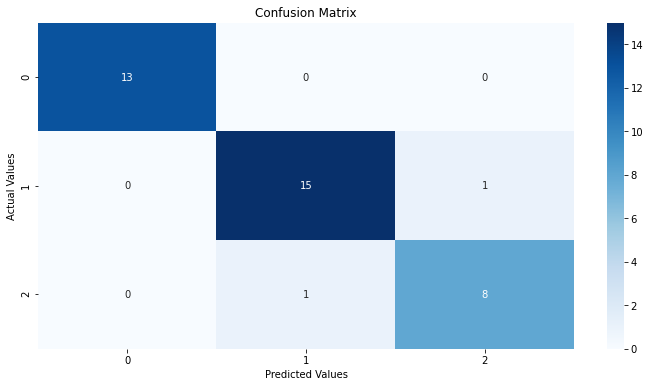

In [11]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

## Visualising the Training set results

In [14]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Sepal Lenght')
plt.ylabel('Petal width')
plt.legend()
plt.show()

NameError: name 'np' is not defined

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


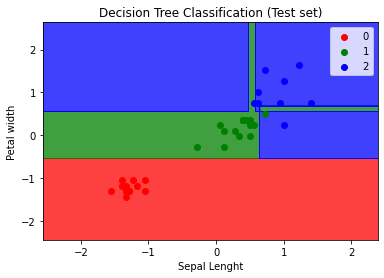

In [49]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Sepal Lenght')
plt.ylabel('Petal width')
plt.legend()
plt.show()

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13  0  0]
 [ 0 15  1]
 [ 0  1  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.94      0.94        16
           2       0.89      0.89      0.89         9

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



In [45]:
from sklearn import tree
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_1 <= -0.54
|   |--- class: 0
|--- feature_1 >  -0.54
|   |--- feature_0 <= 0.64
|   |   |--- feature_1 <= 0.55
|   |   |   |--- class: 1
|   |   |--- feature_1 >  0.55
|   |   |   |--- feature_0 <= 0.48
|   |   |   |   |--- class: 2
|   |   |   |--- feature_0 >  0.48
|   |   |   |   |--- feature_0 <= 0.59
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  0.59
|   |   |   |   |   |--- class: 2
|   |--- feature_0 >  0.64
|   |   |--- feature_1 <= 0.68
|   |   |   |--- feature_1 <= 0.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  0.55
|   |   |   |   |--- class: 1
|   |   |--- feature_1 >  0.68
|   |   |   |--- class: 2



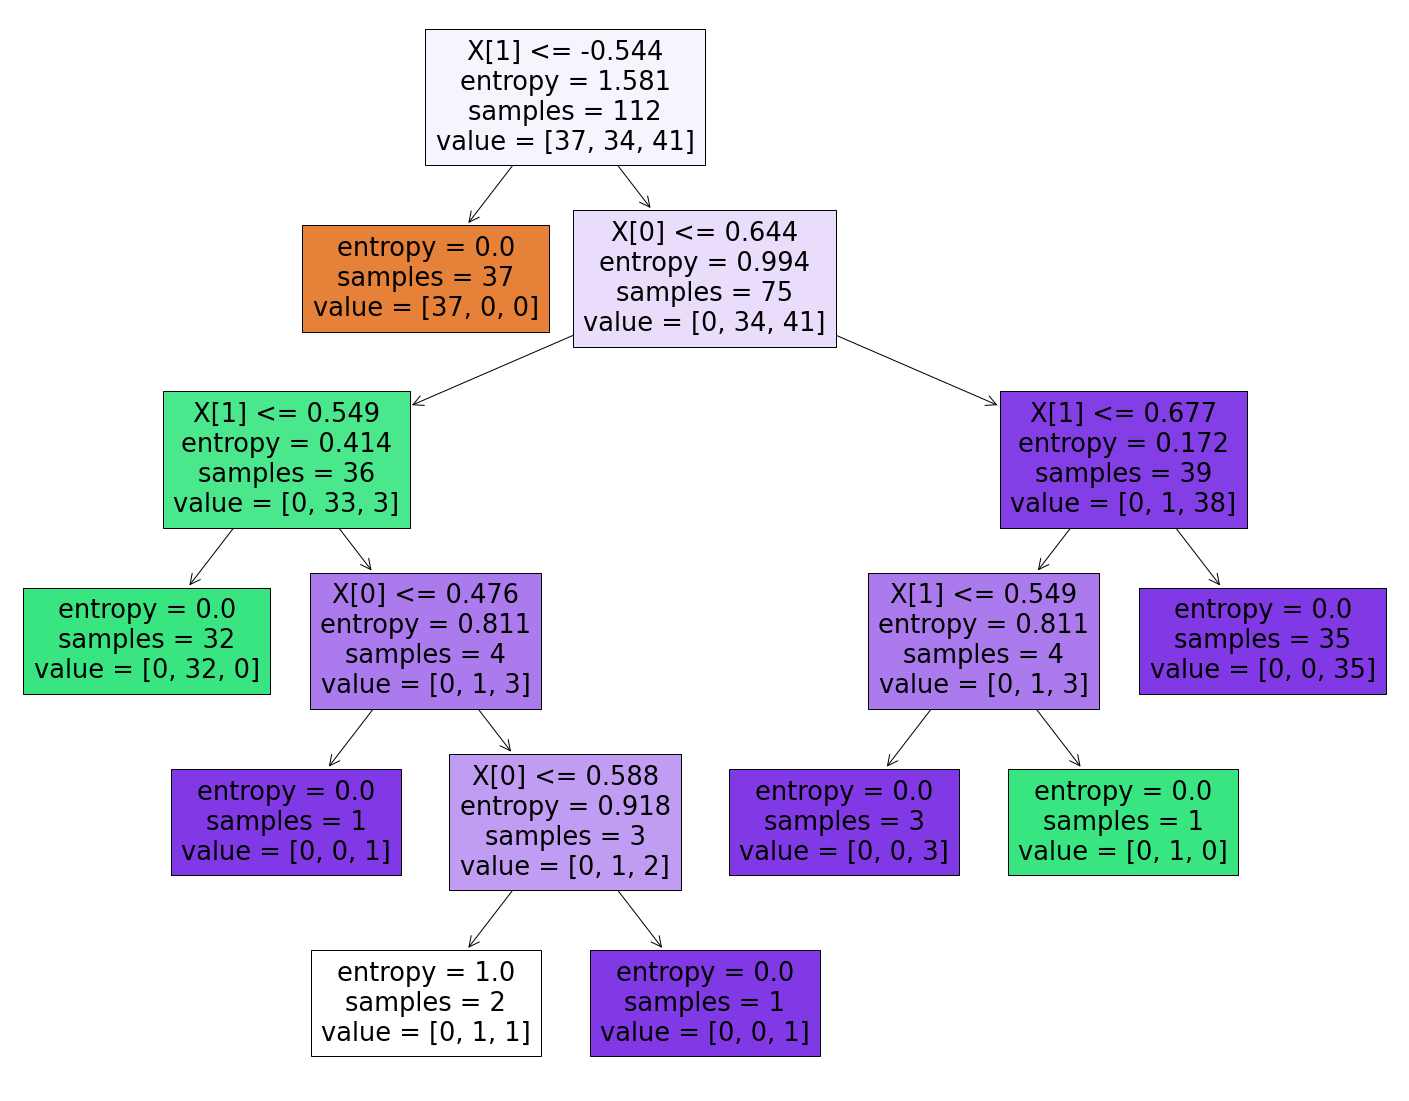

In [46]:
fig=plt.figure(figsize=(25,20))
_=tree.plot_tree(classifier, filled=True)